In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
usdf = pd.read_csv("US.csv")
usdf = usdf.rename(columns=usdf.iloc[0])
usdf = usdf.iloc[1:]
usdf['Country'] = 'US'
usdf['Continent'] = 'NorthAmerica'

In [3]:
ukdf = pd.read_csv("UK.csv")
ukdf = ukdf.rename(columns=ukdf.iloc[0])
ukdf = ukdf.iloc[1:]
ukdf['Country'] = 'UK'
ukdf['Continent'] = 'Europe'

In [5]:
swdf = pd.read_csv("sweden.csv")
swdf = swdf.rename(columns=swdf.iloc[0])
swdf = swdf.iloc[1:]
swdf['Country'] = 'SW'
swdf['Continent'] = 'Europe'

In [6]:
cadf = pd.read_csv("CA.csv")
cadf = cadf.rename(columns=cadf.iloc[0])
cadf = cadf.iloc[1:]
cadf['Country'] = 'CA'
cadf['Continent'] = 'NorthAmerica'

In [7]:
frdf = pd.read_csv("FR.csv")
frdf = frdf.rename(columns=frdf.iloc[0])
frdf = frdf.iloc[1:]
frdf['Country'] = 'FR'
frdf['Continent'] = 'Europe'

In [45]:
brdf = pd.read_csv("BR.csv")
brdf = brdf.rename(columns=brdf.iloc[0])
brdf = brdf.iloc[1:]
brdf['Country'] = 'BR'
brdf['Continent'] = 'LatinAmerica'

In [78]:
ausdf = pd.read_csv("AU.csv")
ausdf = ausdf.rename(columns=ausdf.iloc[0])
ausdf = ausdf.iloc[1:]
ausdf['Country'] = 'AUS'
ausdf['Continent'] = 'AUS'

In [9]:
mxdf = pd.read_csv("mx.csv")
mxdf = brdf.rename(columns = mxdf.iloc[0])
mxdf = brdf.iloc[1:]
mxdf['Country'] = 'MX'
mxdf['Continent'] = 'LatinAmerica'

/Users/zoe/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/zoe/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [79]:
frames = [usdf,cadf,ukdf,swdf,brdf,mxdf,frdf,ausdf]
df = pd.concat(frames, sort=False)
import statsmodels.api as sm
from statsmodels.formula.api import ols 
df['Streams'] = df['Streams'].astype(str).astype(int)


In [80]:
df

,Position,Track Name,Artist,Streams,URL,Country,Continent
1,1,HIGHEST IN THE ROOM,Travis Scott,9395208,https://open.spotify.com/track/3eekarcy7kvN4yt...,US,NorthAmerica
2,2,Circles,Post Malone,9248356,https://open.spotify.com/track/21jGcNKet2qwijl...,US,NorthAmerica
3,3,Lose You To Love Me,Selena Gomez,8918735,https://open.spotify.com/track/1HfMVBKM75vxSfs...,US,NorthAmerica
4,4,Bandit (with YoungBoy Never Broke Again),Juice WRLD,8522651,https://open.spotify.com/track/6Gg1gjgKi2AK4e0...,US,NorthAmerica
5,5,ROXANNE,Arizona Zervas,8252346,https://open.spotify.com/track/1ZPWWSwCkxKfqdp...,US,NorthAmerica
...,...,...,...,...,...,...,...
196,196,Under Pressure - Remastered,Queen,27520,https://open.spotify.com/track/2fuCquhmrzHpu5x...,AUS,AUS
197,197,Brown Eyed Girl,Van Morrison,27505,https://open.spotify.com/track/3yrSvpt2l1xhsV9...,AUS,AUS
198,198,Enemies (feat. DaBaby),Post Malone,27482,https://open.spotify.com/track/0Xek5rqai2jcOWC...,AUS,AUS
199,199,Love Songs,DeMaris,27392,https://open.spotify.com/track/72x6B8bGELlZkVj...,AUS,AUS


Text(0.5, 0, 'Country')

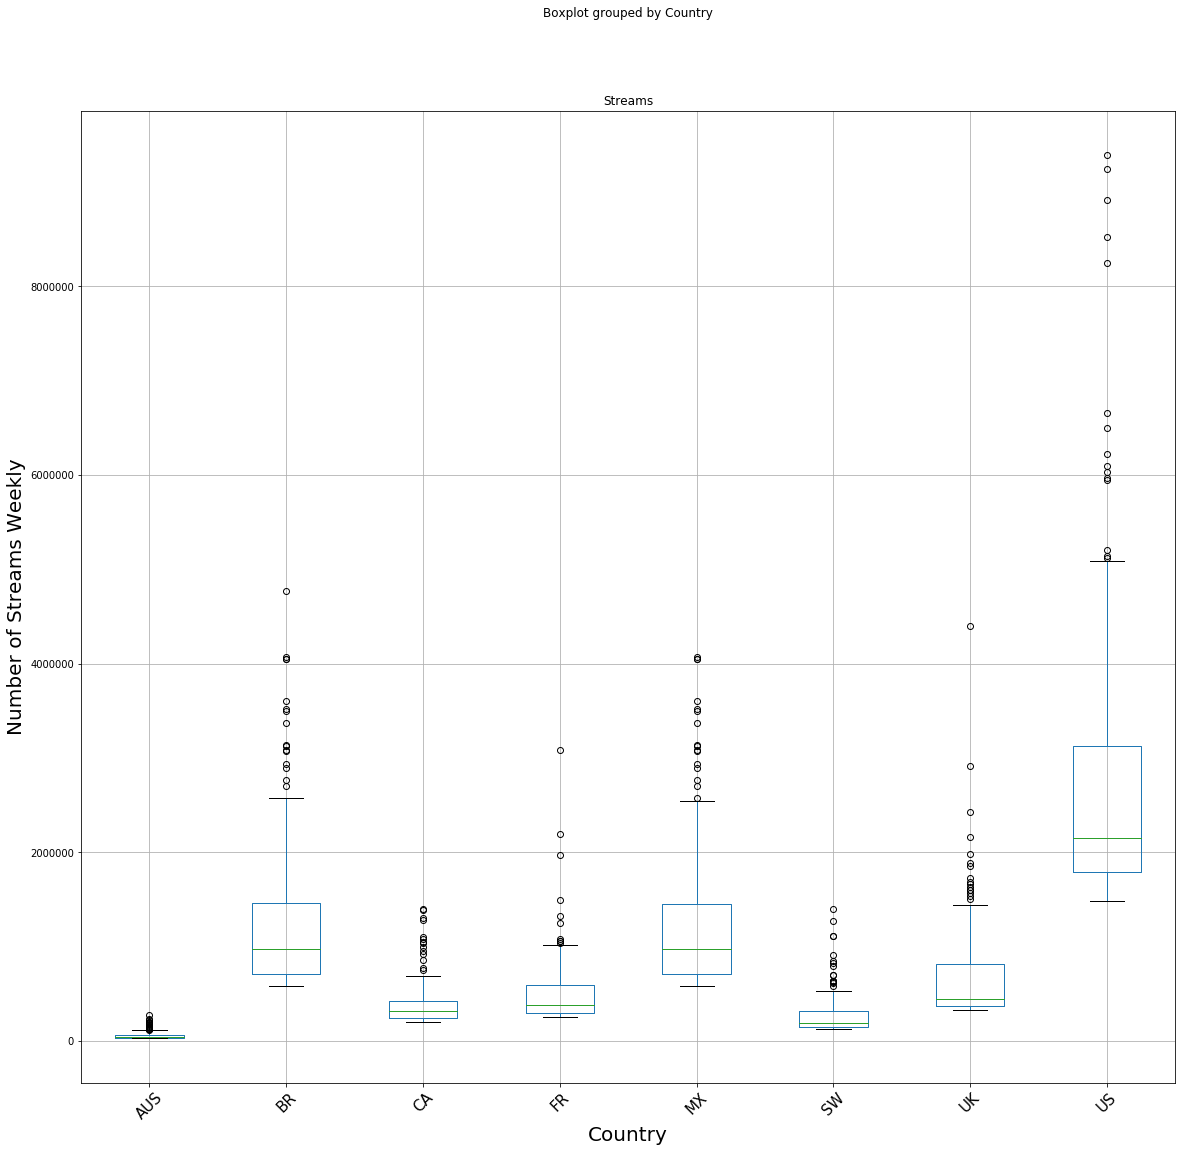

In [81]:
df.boxplot('Streams', by = 'Country', figsize = (19,18))
plt.xticks(rotation=45, size = 15)
plt.ylabel(ylabel = 'Number of Streams Weekly',size = 20)
plt.xlabel(xlabel = 'Country',size = 20)

Text(0.5, 0, 'Country')

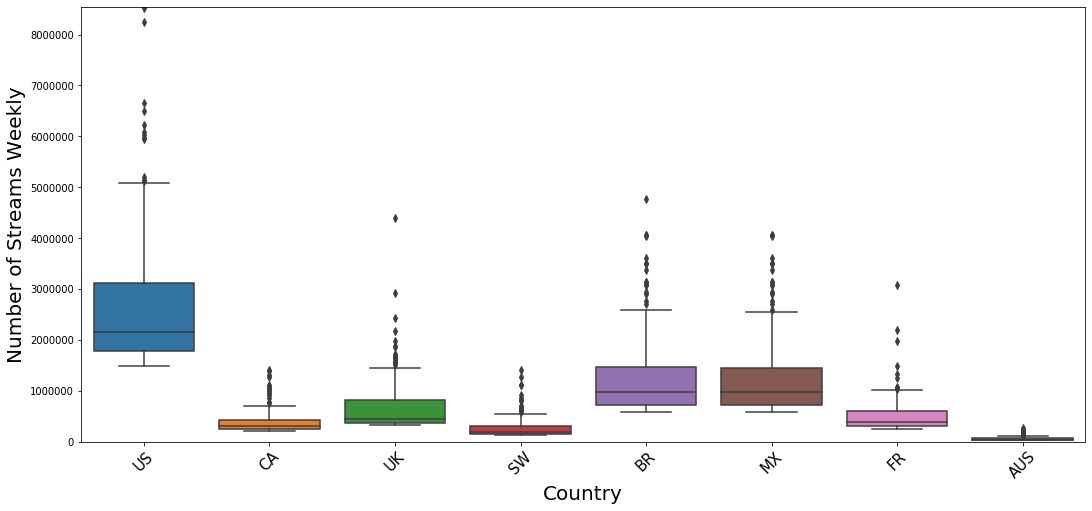

In [82]:
f, ax = plt.subplots(figsize=(18, 8))
fig = sns.boxplot(x='Country', y="Streams", data=df)
fig.axis(ymin=0, ymax=8550000)
plt.xticks(rotation=45, size = 15)
plt.ylabel(ylabel = 'Number of Streams Weekly',size = 20)
plt.xlabel(xlabel = 'Country',size = 20)

Text(0.5, 0, 'Continent')

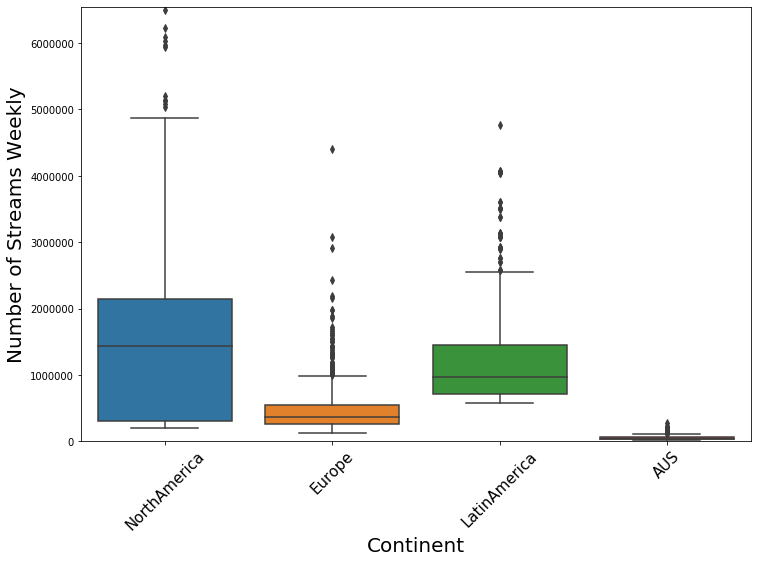

In [83]:
f, ax = plt.subplots(figsize=(12, 8))
fig = sns.boxplot(x='Continent', y="Streams", data=df)
fig.axis(ymin=0, ymax=6550000)
plt.xticks(rotation=45, size = 15)
plt.ylabel(ylabel = 'Number of Streams Weekly',size = 20)
plt.xlabel(xlabel = 'Continent',size = 20)

In [84]:
formula = 'Streams ~ Country'
lm = ols(formula, df).fit()

In [85]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

# why can we use ols in this case?
anova_country = ols('Streams~Country',data=df).fit()

anova_country.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Streams   R-squared:                       0.563
Model:                            OLS   Adj. R-squared:                  0.561
Method:                 Least Squares   F-statistic:                     292.5
Date:                Tue, 12 Nov 2019   Prob (F-statistic):          2.23e-280
Time:                        22:22:03   Log-Likelihood:                -23796.
No. Observations:                1599   AIC:                         4.761e+04
Df Residuals:                    1591   BIC:                         4.765e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      5.697e+04   4.98e+04      1.144      0.253   -4.07e+04    1.55e+05
Country[T.BR]  1.199e+06   7.05e+04     17.024      0.000    1.06e+06    1.34e+06
Country[T.CA]  3.315e+05   7.05e+04      4.706      0.000    1.93e+05     4.7e+05
Country[T.FR]  4.463e+05   7.05e+04      6.335      0.000    3.08e+05    5.85e+05
Country[T.MX]  1.182e+06   7.05e+04     16.752      0.000    1.04e+06    1.32e+06
Country[T.SW]  2.109e+05   7.05e+04      2.993      0.003    7.27e+04    3.49e+05
Country[T.UK]  6.241e+05   7.05e+04      8.858      0.000    4.86e+05    7.62e+05
Country[T.US]   2.65e+06   7.05e+04     37.609      0.000    2.51e+06    2.79e+06
==============================================================================
Omnibus:                     1301.248   Durbin-Watson:                   0.086
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            38665.726
Skew:                           3.627   Prob(JB):                         0.00
Kurtosis:                      25.972   Cond. No.                         8.88
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [68]:
anova_continent = ols('Streams~Continent',data=df).fit()

anova_continent.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Streams   R-squared:                       0.184
Model:                            OLS   Adj. R-squared:                  0.183
Method:                 Least Squares   F-statistic:                     157.9
Date:                Tue, 12 Nov 2019   Prob (F-statistic):           1.50e-62
Time:                        21:52:29   Log-Likelihood:                -21285.
No. Observations:                1399   AIC:                         4.258e+04
Df Residuals:                    1396   BIC:                         4.259e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                  4.841e+05   4.01e+04     12.085      0.000    4.06e+05    5.63e+05
Continent[T.LatinAmerica]  7.635e+05   6.34e+04     12.046      0.000    6.39e+05    8.88e+05
Continent[T.NorthAmerica]  1.064e+06   6.33e+04     16.792      0.000    9.39e+05    1.19e+06
==============================================================================
Omnibus:                      885.186   Durbin-Watson:                   0.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12929.181
Skew:                           2.716   Prob(JB):                         0.00
Kurtosis:                      16.867   Cond. No.                         3.38
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [86]:
formula = 'Streams ~ C(Country)'
lm = ols(formula, df).fit()
table = sm.stats.anova_lm(lm, typ=2)
print(table)

                  sum_sq      df           F         PR(>F)
C(Country)  1.016236e+15     7.0  292.463751  2.229119e-280
Residual    7.897594e+14  1591.0         NaN            NaN


In [87]:
formula = 'Streams ~ C(Continent)'
lm = ols(formula, df).fit()
table = sm.stats.anova_lm(lm, typ=2)
print(table)

                    sum_sq      df           F         PR(>F)
C(Continent)  4.616246e+14     3.0  182.561484  9.344786e-102
Residual      1.344371e+15  1595.0         NaN            NaN


In [69]:
from statsmodels.sandbox.stats.multicomp import multipletests
pvals = [.01, .05, .10, .50, .99]


In [71]:

# Create a list of the adjusted p-values
p_adjusted = multipletests(pvals, alpha=.05, method='bonferroni')

# Print the resulting conclusions
print(p_adjusted[0])
print(p_adjusted[1])



[ True False False False False]
[0.05 0.25 0.5  1.   1.  ]


In [96]:
#Most-streamed weekly tracks on Spotify worldwide as of October 17, 2019 (in million streams)
sorteddf = df.sort_values(by=['Streams'],ascending=False).head(20)

In [117]:
df

,Position,Track Name,Artist,Streams,URL,Country,Continent
1,1,HIGHEST IN THE ROOM,Travis Scott,9395208,https://open.spotify.com/track/3eekarcy7kvN4yt...,US,NorthAmerica
2,2,Circles,Post Malone,9248356,https://open.spotify.com/track/21jGcNKet2qwijl...,US,NorthAmerica
3,3,Lose You To Love Me,Selena Gomez,8918735,https://open.spotify.com/track/1HfMVBKM75vxSfs...,US,NorthAmerica
4,4,Bandit (with YoungBoy Never Broke Again),Juice WRLD,8522651,https://open.spotify.com/track/6Gg1gjgKi2AK4e0...,US,NorthAmerica
5,5,ROXANNE,Arizona Zervas,8252346,https://open.spotify.com/track/1ZPWWSwCkxKfqdp...,US,NorthAmerica
...,...,...,...,...,...,...,...
196,196,Under Pressure - Remastered,Queen,27520,https://open.spotify.com/track/2fuCquhmrzHpu5x...,AUS,AUS
197,197,Brown Eyed Girl,Van Morrison,27505,https://open.spotify.com/track/3yrSvpt2l1xhsV9...,AUS,AUS
198,198,Enemies (feat. DaBaby),Post Malone,27482,https://open.spotify.com/track/0Xek5rqai2jcOWC...,AUS,AUS
199,199,Love Songs,DeMaris,27392,https://open.spotify.com/track/72x6B8bGELlZkVj...,AUS,AUS


(array([       0.,  2000000.,  4000000.,  6000000.,  8000000., 10000000.]),
 <a list of 6 Text xticklabel objects>)

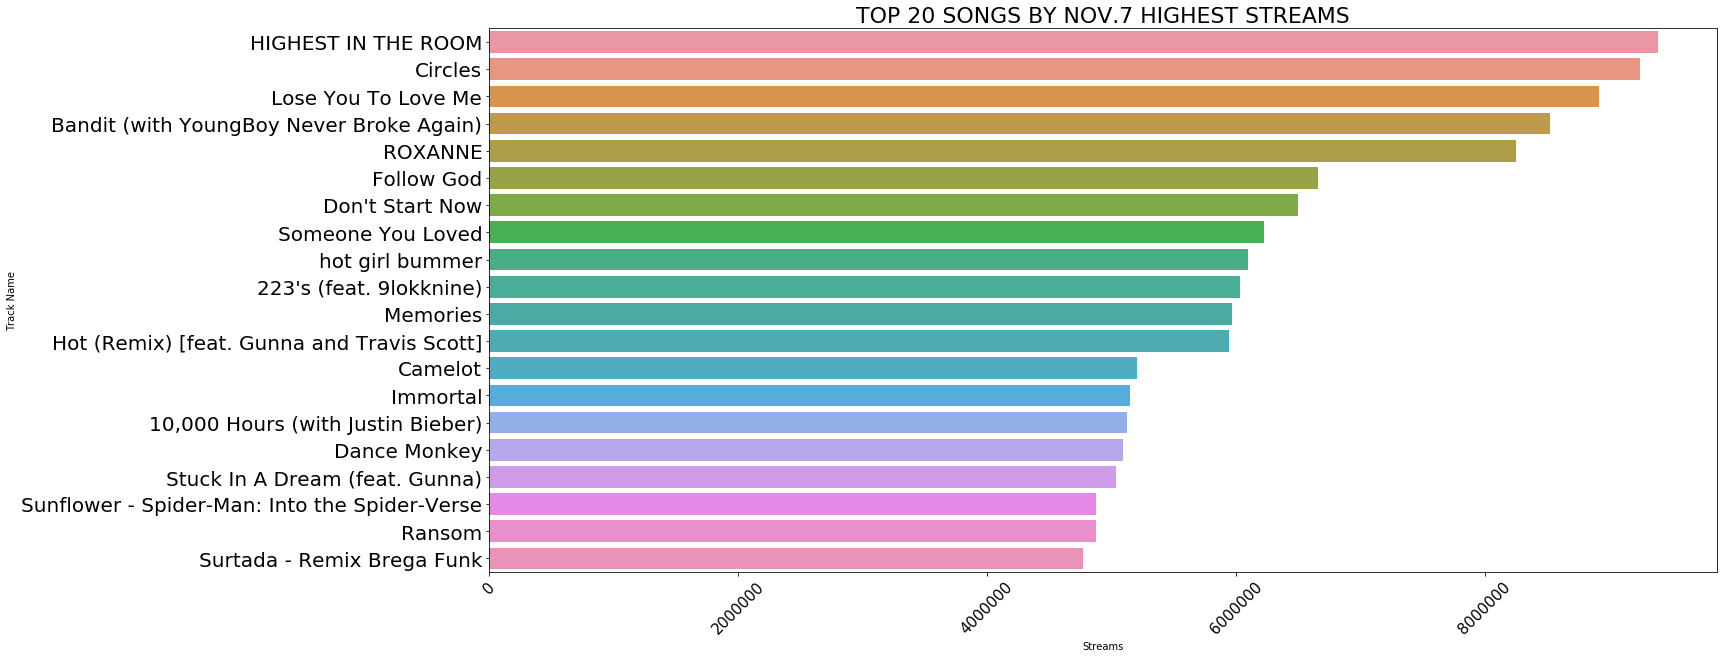

In [114]:
f, ax = plt.subplots(figsize=(22, 10))
fig = sns.barplot(x = 'Streams', y = 'Track Name', data = sorteddf)
plt.title('TOP 20 SONGS BY NOV.7 HIGHEST STREAMS', size = 22)
plt.yticks(size = 20)
plt.xticks(rotation=45, size = 15)


In [107]:
anova(df.Streams, df.Country)


NameError: name 'anova' is not defined

In [108]:
df

,Position,Track Name,Artist,Streams,URL,Country,Continent
1,1,HIGHEST IN THE ROOM,Travis Scott,9395208,https://open.spotify.com/track/3eekarcy7kvN4yt...,US,NorthAmerica
2,2,Circles,Post Malone,9248356,https://open.spotify.com/track/21jGcNKet2qwijl...,US,NorthAmerica
3,3,Lose You To Love Me,Selena Gomez,8918735,https://open.spotify.com/track/1HfMVBKM75vxSfs...,US,NorthAmerica
4,4,Bandit (with YoungBoy Never Broke Again),Juice WRLD,8522651,https://open.spotify.com/track/6Gg1gjgKi2AK4e0...,US,NorthAmerica
5,5,ROXANNE,Arizona Zervas,8252346,https://open.spotify.com/track/1ZPWWSwCkxKfqdp...,US,NorthAmerica
...,...,...,...,...,...,...,...
196,196,Under Pressure - Remastered,Queen,27520,https://open.spotify.com/track/2fuCquhmrzHpu5x...,AUS,AUS
197,197,Brown Eyed Girl,Van Morrison,27505,https://open.spotify.com/track/3yrSvpt2l1xhsV9...,AUS,AUS
198,198,Enemies (feat. DaBaby),Post Malone,27482,https://open.spotify.com/track/0Xek5rqai2jcOWC...,AUS,AUS
199,199,Love Songs,DeMaris,27392,https://open.spotify.com/track/72x6B8bGELlZkVj...,AUS,AUS


(array([       0.,  2000000.,  4000000.,  6000000.,  8000000., 10000000.]),
 <a list of 6 Text xticklabel objects>)

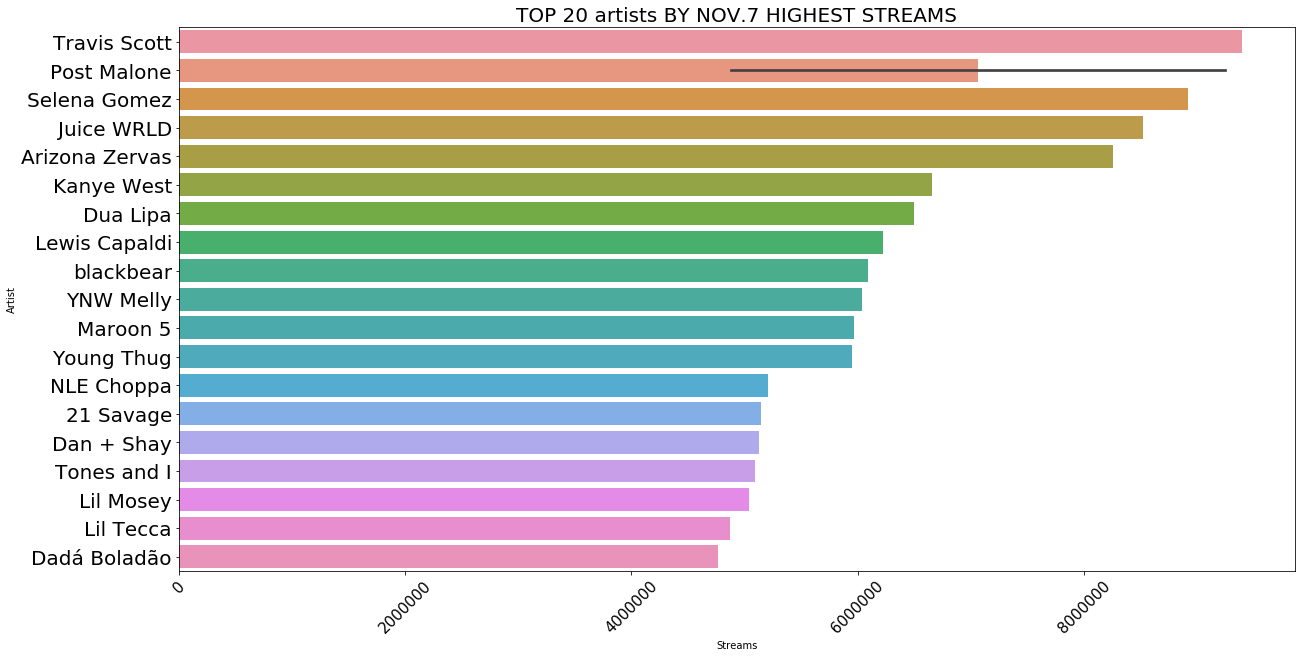

In [113]:
f, ax = plt.subplots(figsize=(20, 10))
fig = sns.barplot(x = 'Streams', y = 'Artist', data = sorteddf)
plt.title('TOP 20 artists BY NOV.7 HIGHEST STREAMS', size = 20)
plt.yticks(size = 20)
plt.xticks(rotation=45, size = 15)

In [116]:
brdf

,Position,Track Name,Artist,Streams,URL,Country,Continent
1,1,Surtada - Remix Brega Funk,Dadá Boladão,4767587,https://open.spotify.com/track/5F8ffc8KWKNawll...,BR,LatinAmerica
2,2,Gaiola É o Troco,MC Du Black,4066848,https://open.spotify.com/track/3Uq45ipGutypFPm...,BR,LatinAmerica
3,3,Some que ele vem atrás,Anitta,4053084,https://open.spotify.com/track/2qD7VoDYcrAPY0c...,BR,LatinAmerica
4,4,Supera - Ao Vivo,Marília Mendonça,4047123,https://open.spotify.com/track/3GmJxfnUDrIs1iC...,BR,LatinAmerica
5,5,Hit Contagiante,Felipe Original,3600154,https://open.spotify.com/track/5dKesZwp6deuhEe...,BR,LatinAmerica
...,...,...,...,...,...,...,...
196,196,Garupa,Luísa Sonza,587771,https://open.spotify.com/track/1HEr5uCRyuuLlVC...,BR,LatinAmerica
197,197,Mandona - Acústico,Oriente,585805,https://open.spotify.com/track/0R4dwzW253KTxch...,BR,LatinAmerica
198,198,Dizeres,Lourena,585786,https://open.spotify.com/track/3Vc8vnid3noqupe...,BR,LatinAmerica
199,199,Cerveja De Garrafa (Fumaça Que Eu Faço) - Ao Vivo,Atitude 67,579415,https://open.spotify.com/track/2PADJK4rhdklqFL...,BR,LatinAmerica


In [ ]:
def pct_bar_labels():
    font_size = 15
    plt.ylabel('Relative Frequency (%)', fontsize = font_size)
    plt.xticks(rotation = 0, fontsize = font_size)
    plt.yticks([]) 
    
    # Set individual bar lebels in proportional scale
    for x in ax1.patches:
        ax1.annotate(str(x.get_height()) + '%', 
        (x.get_x() + x.get_width()/2., x.get_height()), ha = 'center', va = 'center', xytext = (0, 7), 
        textcoords = 'offset points', fontsize = font_size, color = 'black')
         
'''#3.Function to create a dataframe of absolute and relative frequency of each variable. And plot absolute and relative frequency.'''
def absolute_and_relative_freq(variable):
    global  ax, ax1 
    # Dataframe of absolute and relative frequency
    absolute_frequency = variable.value_counts()
    relative_frequency = round(variable.value_counts(normalize = True)*100, 2)
    # Was multiplied by 100 and rounded to 2 decimal points for percentage.
    df = pd.DataFrame({'Absolute Frequency':absolute_frequency, 'Relative Frequency(%)':relative_frequency})
    print('Absolute & Relative Frequency of',variable.name,':')
    display(df)
    
    # This portion plots absolute frequency with bar labeled.
    fig_size = (18,5)
    font_size = 15
    title_size = 18
    ax =  absolute_frequency.plot.bar(title = 'Absolute Frequency of %s' %variable.name, figsize = fig_size)
    ax.title.set_size(title_size)
    abs_bar_labels()  # Displays bar labels in abs scale.
    plt.show()
    
    # This portion plots relative frequency with bar labeled.
    ax1 = relative_frequency.plot.bar(title = 'Relative Frequency of %s' %variable.name, figsize = fig_size)
    ax1.title.set_size(title_size)
    pct_bar_labels() # Displays bar labels in relative scale.
    plt.show()